# California Housing Challenge

The notebook is intened to predict the average house value upon the provided features

In [9]:
# Import Standard Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [5]:
# Read treaning data
california_housing_train = pd.read_csv('./../data/california_housing_train.csv')

In [6]:
california_housing_train.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [8]:
california_housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


## Eploratory data analysis

### Median income distribution

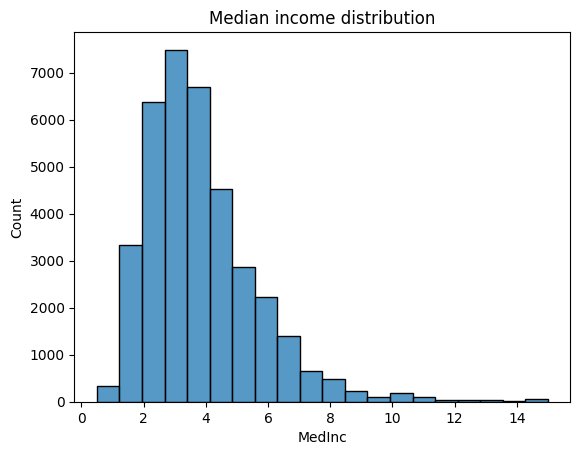

In [15]:
# median income (MedInc) distribution
ax = sns.histplot(california_housing_train, x = 'MedInc', bins = 20)

ax.set_title('Median income distribution')

plt.show()

## House value per median income

In [18]:
# scatter plot with median income and median house value (MedHouseVal)
sns.scatter(